<ipython-input-1-8abc571d78ee>:34: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_samay, _ = curve_fit(saturation_function, data_samay["Adstock"], data_samay["Base_Views"])
<ipython-input-1-8abc571d78ee>:35: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_tanmay, _ = curve_fit(saturation_function, data_tanmay["Adstock"], data_tanmay["Base_Views"])
<ipython-input-1-8abc571d78ee>:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_aakash, _ = curve_fit(saturation_function, data_aakash["Adstock"], data_aakash["Base_Views"])


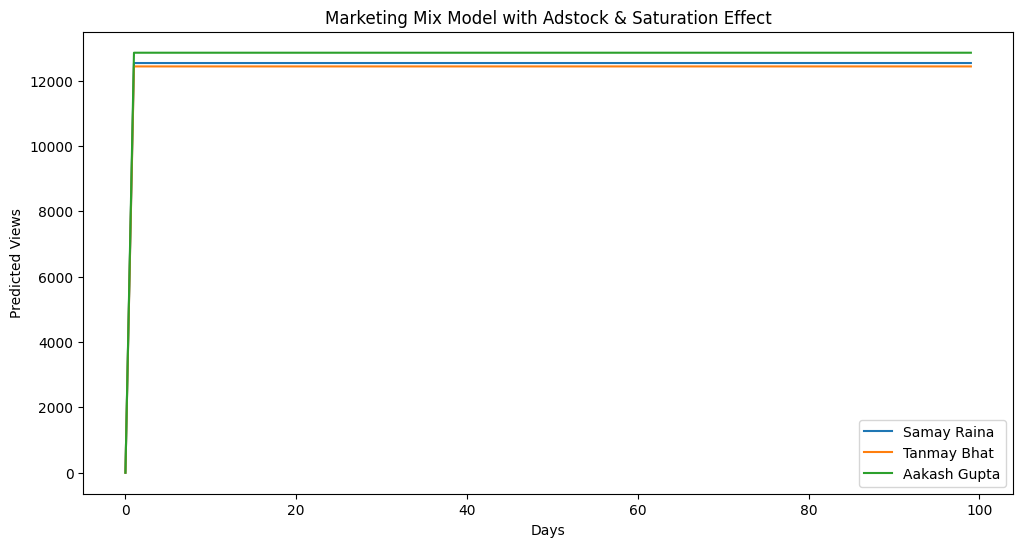

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Simulate data
days = 100
np.random.seed(42)

def generate_synthetic_data():
    ad_spend = np.random.uniform(100, 1000, days)
    base_views = np.random.uniform(5000, 20000, days)
    return pd.DataFrame({"Day": np.arange(days), "Ad_Spend": ad_spend, "Base_Views": base_views})

data_samay = generate_synthetic_data()
data_tanmay = generate_synthetic_data()
data_aakash = generate_synthetic_data()

# Adstock Effect (carryover)
def apply_adstock(series, decay=0.5):
    adstock_values = np.zeros_like(series)
    for i in range(1, len(series)):
        adstock_values[i] = series[i] + decay * adstock_values[i-1]
    return adstock_values

data_samay["Adstock"] = apply_adstock(data_samay["Ad_Spend"], decay=0.6)
data_tanmay["Adstock"] = apply_adstock(data_tanmay["Ad_Spend"], decay=0.5)
data_aakash["Adstock"] = apply_adstock(data_aakash["Ad_Spend"], decay=0.4)

# Saturation Effect (diminishing returns)
def saturation_function(x, a, b):
    return a * (1 - np.exp(-b * x))

popt_samay, _ = curve_fit(saturation_function, data_samay["Adstock"], data_samay["Base_Views"])
popt_tanmay, _ = curve_fit(saturation_function, data_tanmay["Adstock"], data_tanmay["Base_Views"])
popt_aakash, _ = curve_fit(saturation_function, data_aakash["Adstock"], data_aakash["Base_Views"])

data_samay["Predicted_Views"] = saturation_function(data_samay["Adstock"], *popt_samay)
data_tanmay["Predicted_Views"] = saturation_function(data_tanmay["Adstock"], *popt_tanmay)
data_aakash["Predicted_Views"] = saturation_function(data_aakash["Adstock"], *popt_aakash)

# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(data_samay["Day"], data_samay["Predicted_Views"], label="Samay Raina")
plt.plot(data_tanmay["Day"], data_tanmay["Predicted_Views"], label="Tanmay Bhat")
plt.plot(data_aakash["Day"], data_aakash["Predicted_Views"], label="Aakash Gupta")
plt.xlabel("Days")
plt.ylabel("Predicted Views")
plt.title("Marketing Mix Model with Adstock & Saturation Effect")
plt.legend()
plt.show()

<ipython-input-2-bbc005fd0ff4>:34: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_samay, _ = curve_fit(saturation_function, data_samay["Adstock"], data_samay["Base_Views"])
<ipython-input-2-bbc005fd0ff4>:35: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_tanmay, _ = curve_fit(saturation_function, data_tanmay["Adstock"], data_tanmay["Base_Views"])
<ipython-input-2-bbc005fd0ff4>:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_aakash, _ = curve_fit(saturation_function, data_aakash["Adstock"], data_aakash["Base_Views"])


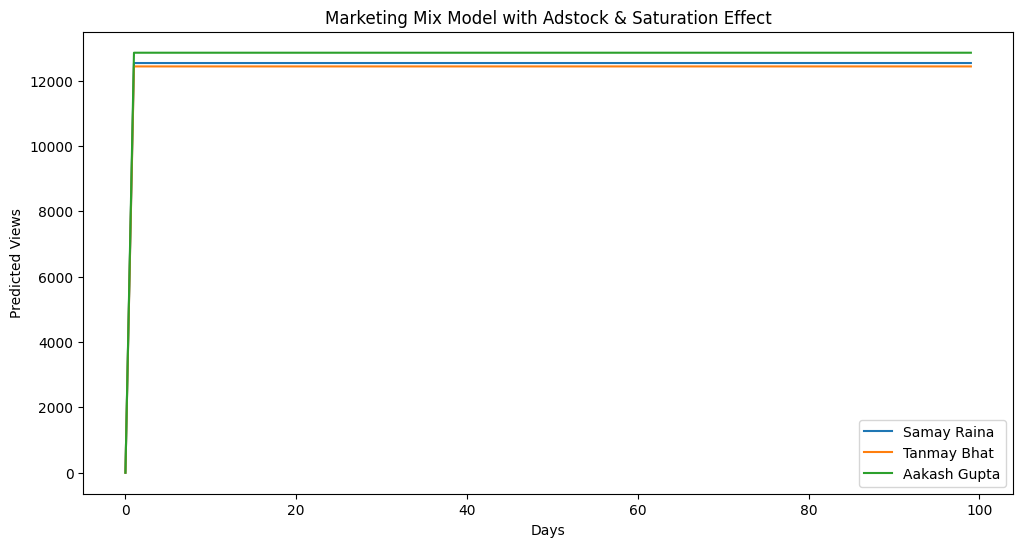

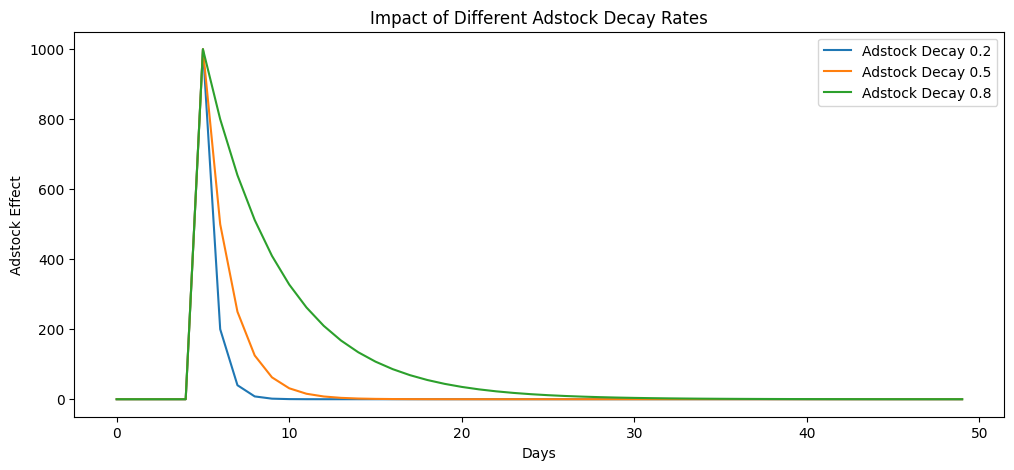

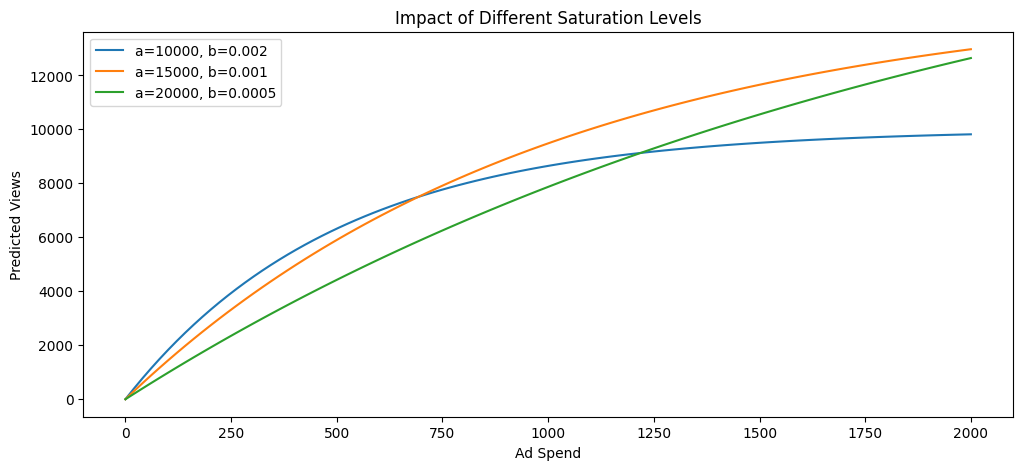

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Simulate data
days = 100
np.random.seed(42)

def generate_synthetic_data():
    ad_spend = np.random.uniform(100, 1000, days)
    base_views = np.random.uniform(5000, 20000, days)
    return pd.DataFrame({"Day": np.arange(days), "Ad_Spend": ad_spend, "Base_Views": base_views})

data_samay = generate_synthetic_data()
data_tanmay = generate_synthetic_data()
data_aakash = generate_synthetic_data()

# Adstock Effect (carryover)
def apply_adstock(series, decay=0.5):
    adstock_values = np.zeros_like(series)
    for i in range(1, len(series)):
        adstock_values[i] = series[i] + decay * adstock_values[i-1]
    return adstock_values

data_samay["Adstock"] = apply_adstock(data_samay["Ad_Spend"], decay=0.6)
data_tanmay["Adstock"] = apply_adstock(data_tanmay["Ad_Spend"], decay=0.5)
data_aakash["Adstock"] = apply_adstock(data_aakash["Ad_Spend"], decay=0.4)

# Saturation Effect (diminishing returns)
def saturation_function(x, a, b):
    return a * (1 - np.exp(-b * x))

popt_samay, _ = curve_fit(saturation_function, data_samay["Adstock"], data_samay["Base_Views"])
popt_tanmay, _ = curve_fit(saturation_function, data_tanmay["Adstock"], data_tanmay["Base_Views"])
popt_aakash, _ = curve_fit(saturation_function, data_aakash["Adstock"], data_aakash["Base_Views"])

data_samay["Predicted_Views"] = saturation_function(data_samay["Adstock"], *popt_samay)
data_tanmay["Predicted_Views"] = saturation_function(data_tanmay["Adstock"], *popt_tanmay)
data_aakash["Predicted_Views"] = saturation_function(data_aakash["Adstock"], *popt_aakash)

# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(data_samay["Day"], data_samay["Predicted_Views"], label="Samay Raina")
plt.plot(data_tanmay["Day"], data_tanmay["Predicted_Views"], label="Tanmay Bhat")
plt.plot(data_aakash["Day"], data_aakash["Predicted_Views"], label="Aakash Gupta")
plt.xlabel("Days")
plt.ylabel("Predicted Views")
plt.title("Marketing Mix Model with Adstock & Saturation Effect")
plt.legend()
plt.show()

# Visualization of Adstock Effect
days = 50
ad_spend = np.zeros(days)
ad_spend[5] = 1000  # Simulating a one-time ad burst

decay_rates = [0.2, 0.5, 0.8]  # Different Adstock decay factors

plt.figure(figsize=(12, 5))
for decay in decay_rates:
    plt.plot(apply_adstock(ad_spend, decay), label=f'Adstock Decay {decay}')
plt.xlabel("Days")
plt.ylabel("Adstock Effect")
plt.title("Impact of Different Adstock Decay Rates")
plt.legend()
plt.show()

# Visualization of Saturation Effect
ad_spend_values = np.linspace(0, 2000, 100)

saturation_params = [(10000, 0.002), (15000, 0.001), (20000, 0.0005)]  # Different saturation levels

plt.figure(figsize=(12, 5))
for a, b in saturation_params:
    plt.plot(ad_spend_values, saturation_function(ad_spend_values, a, b), label=f'a={a}, b={b}')
plt.xlabel("Ad Spend")
plt.ylabel("Predicted Views")
plt.title("Impact of Different Saturation Levels")
plt.legend()
plt.show()

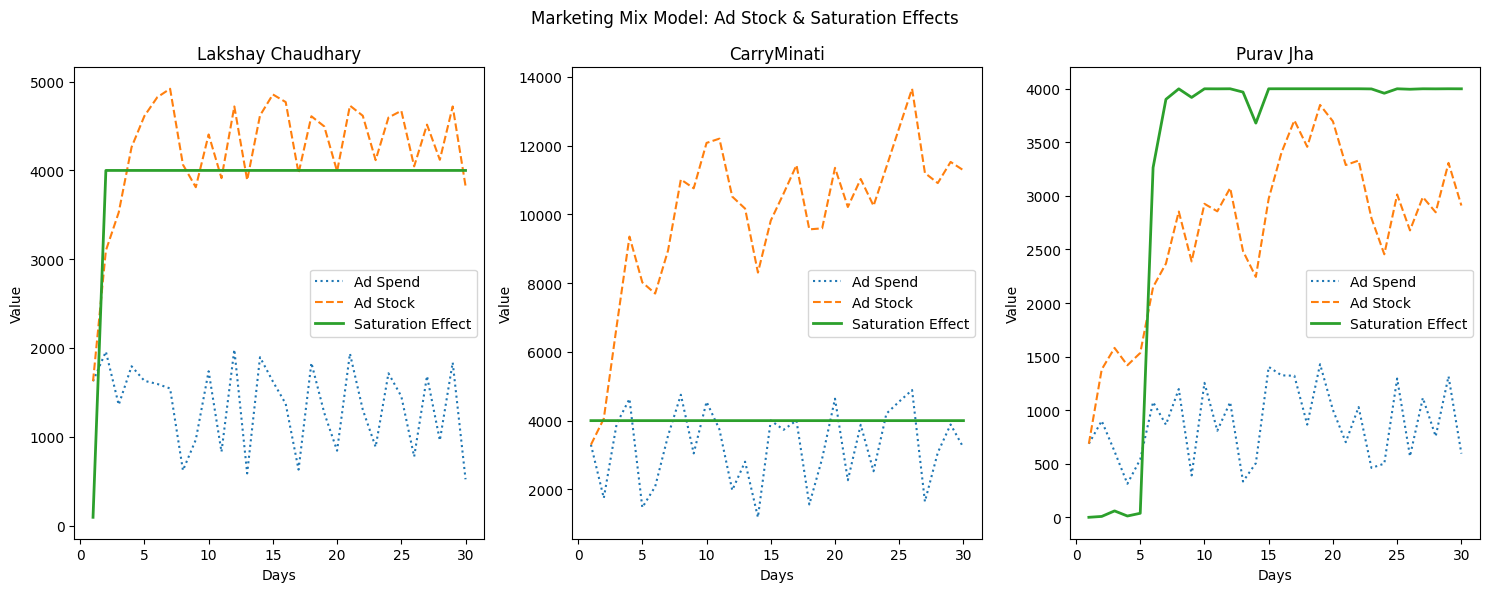

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def ad_stock_transform(spend, decay_rate=0.5):
    """Applies ad stock transformation using a geometric decay model."""
    ad_stock = np.zeros_like(spend)
    for t in range(len(spend)):
        if t == 0:
            ad_stock[t] = spend[t]
        else:
            ad_stock[t] = spend[t] + decay_rate * ad_stock[t - 1]
    return ad_stock

def saturation_effect(ad_stock, saturation_point=1000, slope=0.005):
    """Applies a saturation effect using a logistic function."""
    return saturation_point / (1 + np.exp(-slope * (ad_stock - saturation_point / 2)))

# Simulated ad spend data for 30 days
np.random.seed(42)
days = np.arange(1, 31)
channels = {
    "Lakshay Chaudhary": np.random.randint(500, 2000, size=30),
    "CarryMinati": np.random.randint(1000, 5000, size=30),
    "Purav Jha": np.random.randint(300, 1500, size=30),
}

# Applying ad stock and saturation
results = {}
for channel, spend in channels.items():
    ad_stock = ad_stock_transform(spend, decay_rate=0.7)
    response = saturation_effect(ad_stock, saturation_point=4000, slope=0.01)
    results[channel] = {
        "Spend": spend,
        "Ad Stock": ad_stock,
        "Response": response,
    }

# Visualization
plt.figure(figsize=(15, 6))
for i, (channel, data) in enumerate(results.items(), 1):
    plt.subplot(1, 3, i)
    plt.plot(days, data["Spend"], label="Ad Spend", linestyle='dotted')
    plt.plot(days, data["Ad Stock"], label="Ad Stock", linestyle='dashed')
    plt.plot(days, data["Response"], label="Saturation Effect", linewidth=2)
    plt.title(channel)
    plt.xlabel("Days")
    plt.ylabel("Value")
    plt.legend()

plt.suptitle("Marketing Mix Model: Ad Stock & Saturation Effects")
plt.tight_layout()
plt.show()


In [4]:
import plotly.graph_objects as go

# Define nodes (stages in the customer journey)
labels = [
    "Dashboard", "New Version", "Old Version", "People", "Trends", "Funnels", "Others",
    "Search", "Viewed Docs", "New Support Ticket", "Solved Ticket"
]

# Define links (transitions between stages)
source = [0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 7, 7, 8, 8, 9]
target = [1, 2, 3, 4, 5, 4, 6, 4, 5, 7, 8, 7, 8, 7, 8, 7, 8, 9, 9, 10, 10]
values = [86.12, 4.60, 51.59, 18.78, 29.76, 6.05, 13.57, 17.00, 9.66, 22.87, 2.78,
          37.57, 23.66, 2.77, 17.95, 5.73, 16.56, 3.15, 11.08, 3.35, 95.5]

# Create the Sankey Diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["blue", "orange", "yellow", "pink", "purple", "brown", "red",
               "violet", "green", "cyan", "tomato"]
    ),
    link=dict(
        source=source,
        target=target,
        value=values,
        color=["rgba(31, 119, 180, 0.5)" for _ in source]  # Semi-transparent links
    )
))

# Update layout
fig.update_layout(title_text="Customer Journey Map - Sankey Diagram", font_size=12)

# Show plot
fig.show()

Saving pca.csv to pca (1).csv
Top contributing features to PC1: ['life_expec', 'child_mort', 'total_fer']
Top contributing features to PC2: ['imports', 'exports', 'health']
Explained variance ratio: [0.4595174  0.17181626]


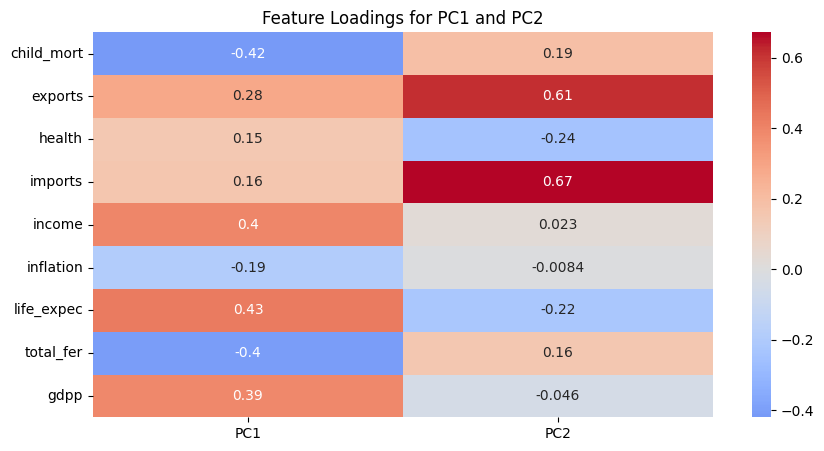

,PC1,PC2
0,-2.913025,0.095621
1,0.429911,-0.588156
2,-0.285225,-0.455174
3,-2.932423,1.695555
4,1.033576,0.136659


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from google.colab import files

# Upload the file manually in Colab
uploaded = files.upload()

# Read the uploaded CSV file
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
df = pd.read_csv(file_name)

# Drop non-numeric columns if any
df_numeric = df.select_dtypes(include=['number'])

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame with PC1 and PC2
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Get the factor loadings (correlation of original features with PCs)
loadings = pd.DataFrame(pca.components_.T,
                        index=df_numeric.columns,
                        columns=['PC1', 'PC2'])

# Identify the most important features for PC1 and PC2
top_features_PC1 = loadings['PC1'].abs().nlargest(3).index.tolist()
top_features_PC2 = loadings['PC2'].abs().nlargest(3).index.tolist()

# Display results
print(f"Top contributing features to PC1: {top_features_PC1}")
print(f"Top contributing features to PC2: {top_features_PC2}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

# Plot the feature importance
plt.figure(figsize=(10,5))
sns.heatmap(loadings, annot=True, cmap="coolwarm", center=0)
plt.title("Feature Loadings for PC1 and PC2")
plt.show()

# Show PCA results
pca_df.head()


Dataset Preview:
   Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


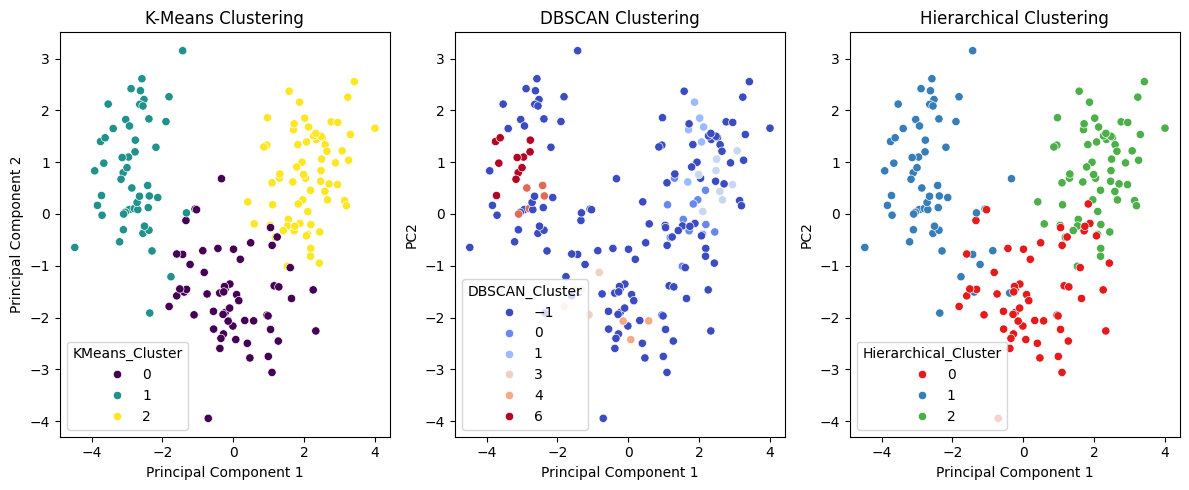

In [11]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA

# Load the dataset (Update file path here)
file_path = "/content/wine_Dataset.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Display first few rows
print("Dataset Preview:")
print(df.head())

# Drop non-numeric columns (if any)
if 'Alcohol' in df.columns:
    df_numeric = df.drop(columns=["Alcohol"])  # Keep Alcohol if it's an identifier
else:
    df_numeric = df

# Standardize the data (important for clustering)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)  # Reduce to 2 dimensions
df_pca = pca.fit_transform(df_scaled)

# Convert PCA results to DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_pca['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=3)  # Adjust parameters based on dataset
df_pca['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
df_pca['Hierarchical_Cluster'] = hierarchical.fit_predict(df_scaled)

# Visualize K-Means Clusters
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["KMeans_Cluster"], palette="viridis")
plt.title("K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Visualize DBSCAN Clusters
plt.subplot(1, 3, 2)
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["DBSCAN_Cluster"], palette="coolwarm")
plt.title("DBSCAN Clustering")
plt.xlabel("Principal Component 1")

# Visualize Hierarchical Clusters
plt.subplot(1, 3, 3)
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["Hierarchical_Cluster"], palette="Set1")
plt.title("Hierarchical Clustering")
plt.xlabel("Principal Component 1")

plt.tight_layout()
plt.show()

Dataset Preview:
   Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
PC1 strongest correlated feature: Flavanoids
PC2 strongest correlated feature: Color


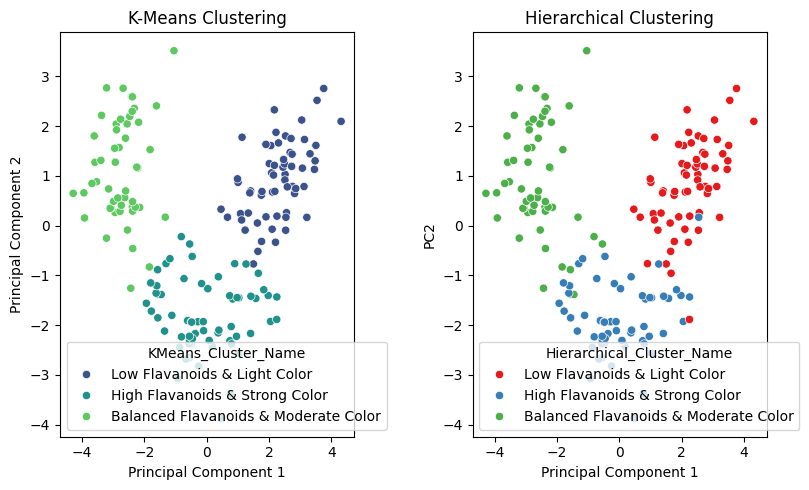


Final Clustering Results:
        PC1       PC2  KMeans_Cluster  DBSCAN_Cluster  Hierarchical_Cluster  \
0  3.316751  1.443463               2               1                     2   
1  2.209465 -0.333393               2              -1                     2   
2  2.516740  1.031151               2              -1                     2   
3  3.757066  2.756372               2              -1                     2   
4  1.008908  0.869831               2              -1                     2   

            KMeans_Cluster_Name     Hierarchical_Cluster_Name  
0  Low Flavanoids & Light Color  Low Flavanoids & Light Color  
1  Low Flavanoids & Light Color  Low Flavanoids & Light Color  
2  Low Flavanoids & Light Color  Low Flavanoids & Light Color  
3  Low Flavanoids & Light Color  Low Flavanoids & Light Color  
4  Low Flavanoids & Light Color  Low Flavanoids & Light Color  


In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load the dataset
file_path = "/content/wine_Dataset.csv"  # Adjust path if necessary
df = pd.read_csv(file_path)

# Display first few rows
print("Dataset Preview:")
print(df.head())

# Drop non-numeric columns if necessary
df_numeric = df.select_dtypes(include=[np.number])

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Apply PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Convert PCA results to DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_pca['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=3)
df_pca['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
df_pca['Hierarchical_Cluster'] = hierarchical.fit_predict(df_scaled)

# Identify correlation between PCA components and original features
feature_importance = pd.DataFrame(
    pca.components_, columns=df_numeric.columns, index=['PC1', 'PC2']
).T

# Identify most correlated features
pc1_top_feature = feature_importance['PC1'].abs().idxmax()
pc2_top_feature = feature_importance['PC2'].abs().idxmax()

print(f"PC1 strongest correlated feature: {pc1_top_feature}")
print(f"PC2 strongest correlated feature: {pc2_top_feature}")

# Assign Cluster Names Based on Traits
cluster_traits = {
    0: f"High {pc1_top_feature} & Strong {pc2_top_feature}",
    1: f"Balanced {pc1_top_feature} & Moderate {pc2_top_feature}",
    2: f"Low {pc1_top_feature} & Light {pc2_top_feature}"
}

df_pca["KMeans_Cluster_Name"] = df_pca["KMeans_Cluster"].map(cluster_traits)
df_pca["Hierarchical_Cluster_Name"] = df_pca["Hierarchical_Cluster"].map(cluster_traits)

# Visualize Clusters
plt.figure(figsize=(12, 5))

# K-Means Clusters
plt.subplot(1, 3, 1)
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["KMeans_Cluster_Name"], palette="viridis")
plt.title("K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Hierarchical Clusters
plt.subplot(1, 3, 2)
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["Hierarchical_Cluster_Name"], palette="Set1")
plt.title("Hierarchical Clustering")
plt.xlabel("Principal Component 1")

plt.tight_layout()
plt.show()

# Display final dataset with clusters
print("\nFinal Clustering Results:")
print(df_pca.head())


   Time      Price    Demand     Supply  Competitor_Price
0     0  98.215877  3.445338  72.473201        100.158769
1     1  96.685094  1.759573  74.117316        100.586906
2     2  95.201050  0.000000  66.968263         99.247973
3     3  93.850076  0.000000  67.794330         98.827499
4     4  92.538054  1.009844  63.295821         97.622869


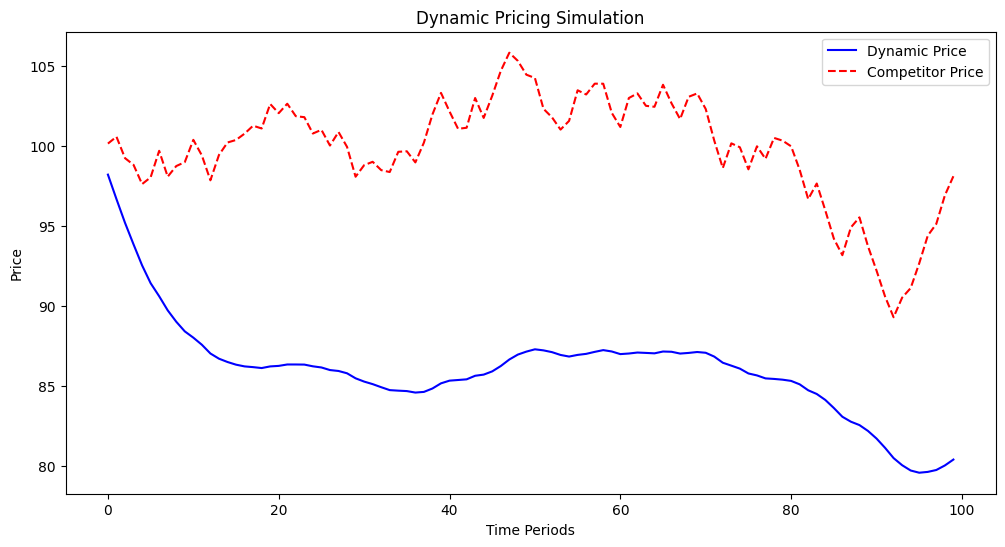

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Simulating demand-supply pricing dynamics

# Parameters
time_periods = 100  # Number of time periods
base_price = 100  # Initial price
competitor_price = 100  # Competitor's initial price
price_elasticity = -0.5  # Elasticity of demand (negative means higher price reduces demand)
supply_elasticity = 0.3  # Higher price increases supply
noise = 5  # Random market fluctuations

# Lists to store results
prices = []
demands = []
supplies = []
competitor_prices = []

# Simulation loop
for t in range(time_periods):
    demand = max(50 + price_elasticity * base_price + np.random.uniform(-noise, noise), 0)
    supply = max(40 + supply_elasticity * base_price + np.random.uniform(-noise, noise), 0)

    # Dynamic price adjustment based on demand-supply balance
    if demand > supply:
        base_price *= 1.02  # Increase price if demand exceeds supply
    else:
        base_price *= 0.98  # Decrease price if supply exceeds demand

    # Influence of competitor pricing
    competitor_price += np.random.uniform(-2, 2)  # Competitor price fluctuates
    base_price += 0.1 * (competitor_price - base_price)  # Adjust price towards competitor

    # Store results
    prices.append(base_price)
    demands.append(demand)
    supplies.append(supply)
    competitor_prices.append(competitor_price)

# Convert to DataFrame
df = pd.DataFrame({
    "Time": range(time_periods),
    "Price": prices,
    "Demand": demands,
    "Supply": supplies,
    "Competitor_Price": competitor_prices
})

# Display first few rows
print(df.head())

# Plot results
plt.figure(figsize=(12,6))
plt.plot(df["Time"], df["Price"], label="Dynamic Price", color='blue')
plt.plot(df["Time"], df["Competitor_Price"], label="Competitor Price", linestyle='dashed', color='red')
plt.xlabel("Time Periods")
plt.ylabel("Price")
plt.title("Dynamic Pricing Simulation")
plt.legend()
plt.show()


   Time       Price      Demand
0     0  100.000000  188.745401
1     1  102.000000  195.823573
2     2   99.960000  194.932429
3     3   97.960800  194.854725
4     4   96.001584  191.624174


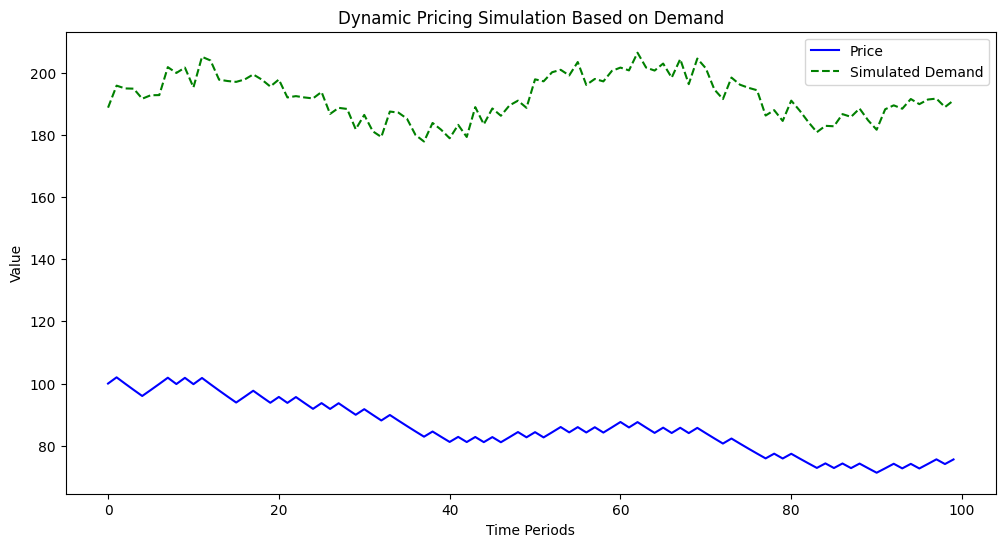

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulating demand trends over time
np.random.seed(42)

time_periods = 100  # Number of time periods
base_price = 100  # Starting price
price_elasticity = -0.4  # Demand elasticity (negative means higher price reduces demand)
seasonality_factor = np.sin(np.linspace(0, 4 * np.pi, time_periods)) * 10  # Seasonal demand variation
trend = np.linspace(0, 5, time_periods)  # Long-term demand trend
random_noise = np.random.uniform(-5, 5, time_periods)  # Market fluctuation noise

# Simulated demand based on seasonality, trend, and price elasticity
demand = 150 + trend + seasonality_factor + random_noise - price_elasticity * base_price

# Adjust price dynamically based on demand trend
prices = []
for t in range(time_periods):
    if t > 0 and demand[t] > demand[t-1]:  # If demand is rising, increase price
        base_price *= 1.02
    elif t > 0 and demand[t] < demand[t-1]:  # If demand drops, reduce price
        base_price *= 0.98
    prices.append(base_price)

# Create a DataFrame to store results
df = pd.DataFrame({
    "Time": range(time_periods),
    "Price": prices,
    "Demand": demand
})

# Display first few rows
print(df.head())

# Plot the simulation results
plt.figure(figsize=(12,6))
plt.plot(df["Time"], df["Price"], label="Price", color='blue')
plt.plot(df["Time"], df["Demand"], label="Simulated Demand", color='green', linestyle='dashed')
plt.xlabel("Time Periods")
plt.ylabel("Value")
plt.title("Dynamic Pricing Simulation Based on Demand")
plt.legend()
plt.show()


In [3]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm

# Define file path (Ensure the file is uploaded to /content/)
file_path = "/content/comedy_series.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Convert necessary columns to numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Gross Revenue'] = pd.to_numeric(df['Gross Revenue'], errors='coerce')

# Drop rows with missing values
df_clean = df.dropna(subset=['Rating', 'Gross Revenue'])

# Check if we have enough data points
if len(df_clean) < 8:
    print("Warning: Not enough data points for statistical significance.")

# Define independent and dependent variables
X = df_clean['Rating']
y = df_clean['Gross Revenue']

# Add constant for OLS regression
X = sm.add_constant(X)

# Run regression model
model = sm.OLS(y, X).fit()

# Display summary of regression analysis
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Gross Revenue   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     4.060
Date:                Sun, 16 Feb 2025   Prob (F-statistic):              0.100
Time:                        10:11:01   Log-Likelihood:                -46.848
No. Observations:                   7   AIC:                             97.70
Df Residuals:                       5   BIC:                             97.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1568.2701    585.502      2.679      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
